In [1]:
#imports

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from weather import Weather
from dataStatistics import Statistics   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
weather = Weather()
statistics=Statistics() 
data = weather.get_data()

data=data.dropna(subset=['RainTomorrow'])

X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train=y_train.map({'Yes':True,'No':False})
y_test=y_test.map({'Yes':True,'No':False})

# print( y.value_counts()['Yes'])
# print(y.value_counts()['No'])
# print(y.value_counts().isna().sum())
# print(y.value_counts().isnull().sum())





c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
# Logistic Regression
from pandas import DataFrame


logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

print( DataFrame({"Actual": y_test, "Predicted": y_pred_test}))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


        Actual  Predicted
57760     True       True
127128   False      False
119994   False      False
7088     False      False
62992     True      False
...        ...        ...
59458     True       True
73138    False      False
35876    False      False
59558    False      False
44133    False      False

[28439 rows x 2 columns]
Model accuracy score: 0.8413
Training set score: 0.8434
Test set score: 0.8413
Confusion matrix

 [[20819  1279]
 [ 3233  3108]]

True Positives(TP) =  20819

True Negatives(TN) =  3108

False Positives(FP) =  1279

False Negatives(FN) =  3233


In [11]:
# Logistic Regression
from pandas import DataFrame


parameters = [{'penalty':['l1','l2','elasticnet']}, 
              {'C':[1, 10, 100, 1000]},
              {'solver':['liblinear', 'lbfgs', 'sag']}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=0)


grid_search.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

print( DataFrame({"Actual": y_test, "Predicted": y_pred_test}))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partit

        Actual  Predicted
57760     True       True
127128   False      False
119994   False      False
7088     False      False
62992     True      False
...        ...        ...
59458     True       True
73138    False      False
35876    False      False
59558    False      False
44133    False      False

[28439 rows x 2 columns]
Model accuracy score: 0.8413
GridSearch CV best score : 0.8432


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
Test set score: 0.8413
Confusion matrix

 [[20819  1279]
 [ 3233  3108]]

True Positives(TP) =  20819

True Negatives(TN) =  3108

False Positives(FP) =  1279

False Negatives(FN) =  3233


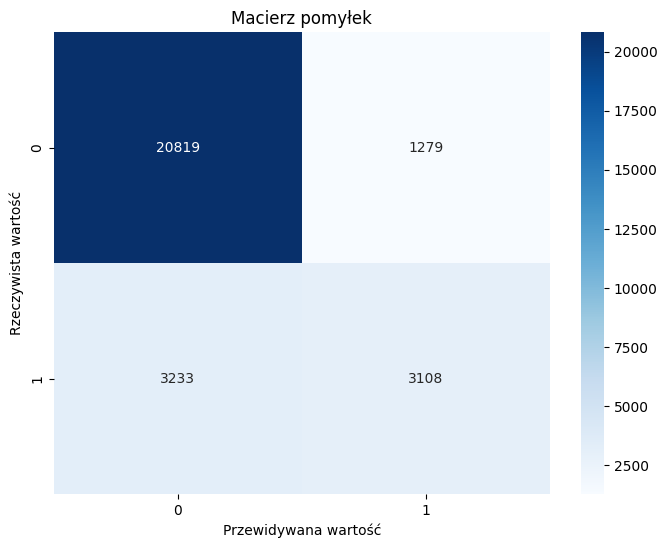

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


confusion_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Przewidywana wartość")
plt.ylabel("Rzeczywista wartość")
plt.title("Macierz pomyłek")
plt.show()

Predykcja: [ True False False ... False False False]
Dokładność: 0.846654242413587


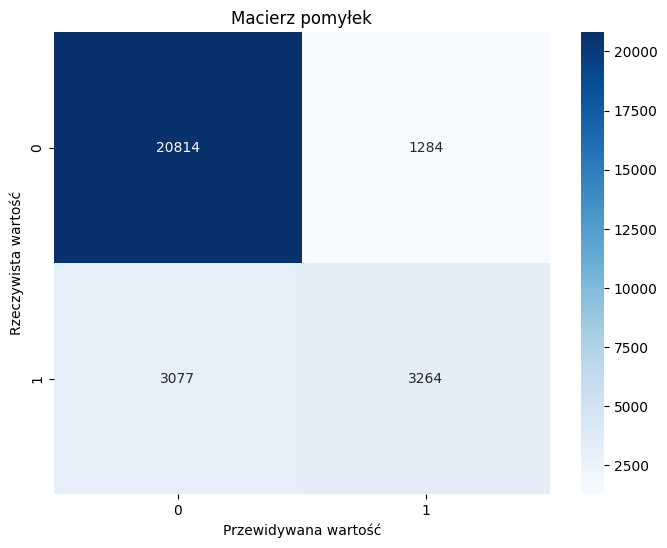

In [12]:
# logistic regresion with pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

weather = Weather()
statistics=Statistics() 
data = weather.get_data2()

categorical=[var for var in data.columns if data[var].dtype=='O' and var != 'RainTomorrow']
numerical_cols = [var for var in data.columns if data[var].dtype !='O']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression(solver='liblinear', random_state=0))])

data=data.dropna(subset=['RainTomorrow'])

X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train=y_train.map({'Yes':True,'No':False})
y_test=y_test.map({'Yes':True,'No':False})

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print('Predykcja:', y_pred_test)

accuracy = accuracy_score(y_test, y_pred_test)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

print("Dokładność:", accuracy)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


confusion_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Przewidywana wartość")
plt.ylabel("Rzeczywista wartość")
plt.title("Macierz pomyłek")
plt.show()

# print("Precyzja:", precision)
# print("Czułość:", recall)
# print("F1-score:", f1)